## **Feature Engineering**
### **Feature Scaling**
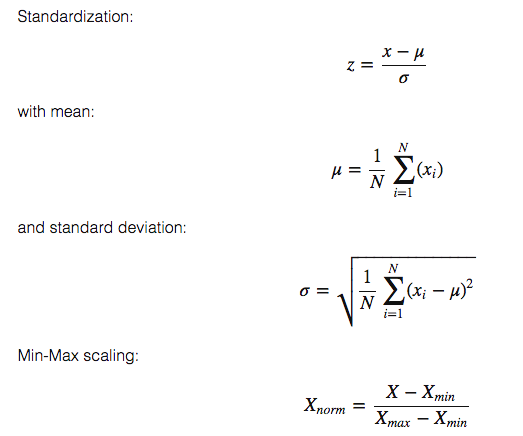

In [4]:
# Importing required libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Sample Data
data = {'height': [1.8, 1.65, 1.7, 1.9, 1.75],
        'weight': [80, 65, 72, 90, 78]}
df = pd.DataFrame(data)

# Normalization (Min-Max Scaling)
min_max_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)
print("Normalized Data:\n", df_normalized)

# Standardization (Z-Score Scaling)
standard_scaler = StandardScaler()
df_standardized = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
print("\nStandardized Data:\n", df_standardized)


Normalized Data:
    height  weight
0     0.6    0.60
1     0.0    0.00
2     0.2    0.28
3     1.0    1.00
4     0.4    0.52

Standardized Data:
      height    weight
0  0.464991  0.359597
1 -1.278724 -1.438390
2 -0.697486 -0.599329
3  1.627467  1.558256
4 -0.116248  0.119866


### **Dummy Variables: Converting Categorical to Numerical**

#### **One Hot Encoding**

In [5]:
# Sample Data
data = {'Gender': ['Male', 'Female', 'Female', 'Male', 'Male'],
        'Salary': [70000, 80000, 65000, 120000, 105000]}
df = pd.DataFrame(data)

# Creating Dummy Variables
df_with_dummies = pd.get_dummies(df, columns=['Gender'], drop_first=True)
print("Data with Dummy Variables:\n", df_with_dummies)


Data with Dummy Variables:
    Salary  Gender_Male
0   70000         True
1   80000        False
2   65000        False
3  120000         True
4  105000         True


#### **Label Encoding**
This method assigns a unique integer to each category. It’s suitable for ordinal categories where the order matters, but it may introduce unintended ordinal relationships in non-ordinal data.

In [8]:
from sklearn.preprocessing import LabelEncoder

# Sample Data
data = {'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red']}
df = pd.DataFrame(data)

# Applying Label Encoding
label_encoder = LabelEncoder()
df['Color_Encoded'] = label_encoder.fit_transform(df['Color'])
print("Label Encoded Data:\n", df)


Label Encoded Data:
    Color  Color_Encoded
0    Red              2
1   Blue              0
2  Green              1
3   Blue              0
4    Red              2


#### **Frequency Encoding**
This method replaces each category with the frequency of that category in the dataset. It’s useful for categorical variables with high cardinality, as it reduces dimensionality.

In [9]:

# Sample Data
data = {'Product': ['A', 'B', 'A', 'C', 'B', 'A', 'D']}
df = pd.DataFrame(data)

# Calculating Frequency Encoding
frequency = df['Product'].value_counts()
df['Product_Frequency'] = df['Product'].map(frequency)
print("Frequency Encoded Data:\n", df)


Frequency Encoded Data:
   Product  Product_Frequency
0       A                  3
1       B                  2
2       A                  3
3       C                  1
4       B                  2
5       A                  3
6       D                  1


#### **Target Encoding (Mean Encoding)**
This method replaces each category with the mean of the target variable for that category. It’s commonly used in scenarios where there is a relationship between the categorical feature and the target variable. Note: It should be used carefully to avoid data leakage.

In [10]:
# Sample Data
data = {'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'C'],
        'Target': [1, 0, 1, 0, 1, 1, 0]}
df = pd.DataFrame(data)

# Calculating Target Mean Encoding
target_mean = df.groupby('Category')['Target'].mean()
df['Category_TargetMean'] = df['Category'].map(target_mean)
print("Target Mean Encoded Data:\n", df)


Target Mean Encoded Data:
   Category  Target  Category_TargetMean
0        A       1                  1.0
1        B       0                  0.5
2        A       1                  1.0
3        C       0                  0.0
4        B       1                  0.5
5        A       1                  1.0
6        C       0                  0.0


#### **Binary Encoding**
Binary Encoding first applies label encoding to the categories, then converts the label into binary format. Each bit of the binary label becomes a new column. It’s efficient for high-cardinality categorical features and reduces dimensionality.

In [ ]:
!pip install category_encoders

In [13]:
from category_encoders import BinaryEncoder

# Sample Data
data = {'Item': ['Apple', 'Banana', 'Orange', 'Banana', 'Apple', 'Grapes']}
df = pd.DataFrame(data)

# Applying Binary Encoding
binary_encoder = BinaryEncoder()
df_binary_encoded = binary_encoder.fit_transform(df['Item'])
print("Binary Encoded Data:\n", df_binary_encoded)


Binary Encoded Data:
    Item_0  Item_1  Item_2
0       0       0       1
1       0       1       0
2       0       1       1
3       0       1       0
4       0       0       1
5       1       0       0


#### **Ordinal Encoding**
Ordinal Encoding is useful when the categories have an inherent order, such as "low," "medium," and "high." You can manually map the categories to integers to maintain the order.

In [14]:

# Sample Data
data = {'Size': ['Small', 'Medium', 'Large', 'Medium', 'Small']}
df = pd.DataFrame(data)

# Defining Ordinal Mapping
size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}
df['Size_Ordinal'] = df['Size'].map(size_mapping)
print("Ordinal Encoded Data:\n", df)


Ordinal Encoded Data:
      Size  Size_Ordinal
0   Small             1
1  Medium             2
2   Large             3
3  Medium             2
4   Small             1


### **Box-Cox Transformation: Normalizing Data Distribution**

What Box Cox Transformation does is that it tries to make the data look more like a normal distribution. It does this by raising the data to a power. The Box Cox Transformation is defined as:

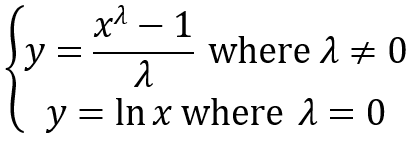

where y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [6]:
from scipy.stats import boxcox

# Sample Data with a Skewed Distribution
data = {'Income': [30000, 35000, 40000, 70000, 80000, 100000, 120000]}
df = pd.DataFrame(data)

# Apply Box-Cox Transformation
df['Income_BoxCox'], _ = boxcox(df['Income'])
print("Data with Box-Cox Transformation:\n", df)


Data with Box-Cox Transformation:
    Income  Income_BoxCox
0   30000      21.653995
1   35000      22.247116
2   40000      22.770576
3   70000      25.065707
4   80000      25.638422
5  100000      26.617906
6  120000      27.439522


Text(0.5, 1.0, 'Box-Cox Transformation')

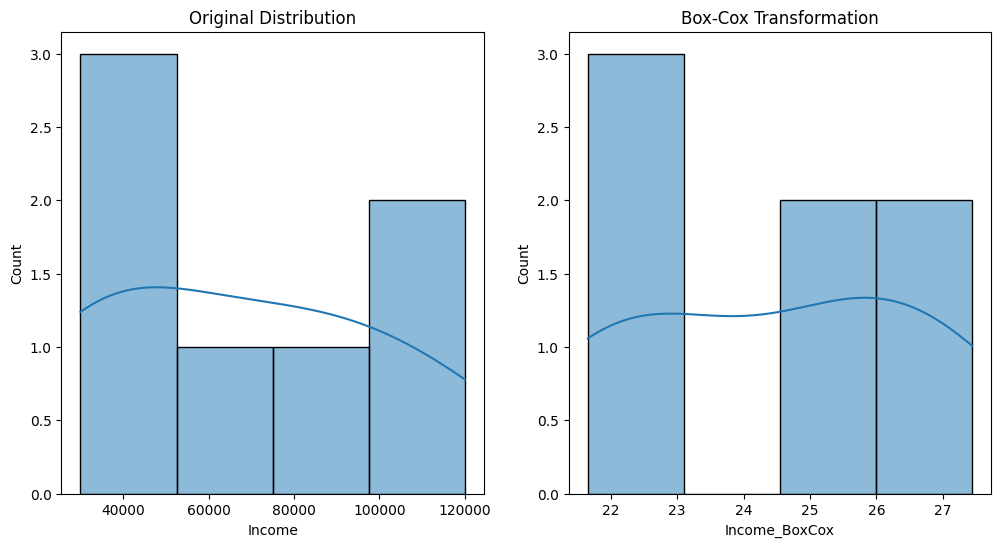

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Income'], kde=True)
plt.title('Original Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Income_BoxCox'], kde=True)
plt.title('Box-Cox Transformation')


#### **P-Value-Based Feature Selection**
- **Explanation**: This method involves statistical hypothesis testing. For each feature, the p-value measures the probability of observing the data given that the feature has no effect. If the p-value is below a certain threshold (e.g., 0.05), it’s generally considered significant and worth keeping.
- **Usage**: Commonly used with regression models to remove irrelevant features.

In [16]:
import statsmodels.api as sm

# Sample Data
data = {'Feature1': [4.5, 3.2, 4.8, 6.5, 3.6],
        'Feature2': [15, 12, 14, 18, 16],
        'Target': [21, 14, 15, 26, 18]}
df = pd.DataFrame(data)

# Preparing the Data
X = df[['Feature1', 'Feature2']]
y = df['Target']
X = sm.add_constant(X)

# Fitting the model and checking p-values
model = sm.OLS(y, X).fit()
p_values = model.pvalues
print("P-Values:\n", p_values)


P-Values:
 const       0.495172
Feature1    0.551048
Feature2    0.263289
dtype: float64


#### **LASSO Feature Selection**
- **Explanation**: LASSO (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that uses L1 regularization. By penalizing the absolute values of coefficients, it forces some of them to be zero, effectively selecting only the most important features. The higher the coefficient, the more important the feature.
- **Usage**: Useful when you have a large number of features and want to select the most relevant ones automatically.

In [17]:
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression

# Generating a Sample Regression Dataset
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=1)
df = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])

# Fitting Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(df, y)

# Checking Coefficients (non-zero coefficients indicate selected features)
print("Lasso Coefficients:\n", lasso.coef_)


Lasso Coefficients:
 [ 7.52029599 50.73196508 35.57003383 26.02584171 20.54163433]


#### **Correlation-Based Feature Selection**
- **Explanation**: Correlation measures the relationship between features and the target variable. Highly correlated features with the target variable are typically useful for prediction, while features that are not correlated can be excluded.
- **Usage**: Ideal for quick feature selection, especially for linear models where highly correlated features with the target are preferred.

In [19]:
# Sample Data
data = {'Feature1': [4.5, 3.2, 4.8, 6.5, 3.6],
        'Feature2': [15, 12, 14, 18, 16],
        'Feature3': [7, 9, 8, 6, 7],
        'Target': [21, 14, 15, 26, 18]}
df = pd.DataFrame(data)

# Calculating Pearson Correlation
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
           Feature1  Feature2  Feature3    Target
Feature1  1.000000  0.757927 -0.741500  0.809096
Feature2  0.757927  1.000000 -0.980581  0.895665
Feature3 -0.741500 -0.980581  1.000000 -0.927815
Target    0.809096  0.895665 -0.927815  1.000000


#### **Point-Biserial Correlation (for Binary Classification)**
- **Explanation**: The Point-Biserial Correlation is a measure of association between a continuous variable and a binary variable. It’s useful for selecting features that are most related to a binary target in classification problems. The correlation coefficient ranges from -1 to 1, where -1 indicates a negative relationship, 0 indicates no relationship, and 1 indicates a positive relationship.
- **Usage**: Often applied in binary classification tasks where the relationship between continuous features and a binary target variable is significant.

In [20]:

from scipy.stats import pointbiserialr

# Sample Data with Binary Target
data = {'Feature': [5, 10, 15, 20, 25, 30, 35, 40],
        'BinaryTarget': [0, 0, 1, 0, 1, 1, 0, 1]}
df = pd.DataFrame(data)

# Calculating Point-Biserial Correlation
correlation, p_value = pointbiserialr(df['Feature'], df['BinaryTarget'])
print("Point-Biserial Correlation:", correlation)
print("P-Value:", p_value)


Point-Biserial Correlation: 0.4364357804719848
P-Value: 0.2796582909046579


#### **Variance Threshold**
- **Explanation**: Variance Threshold removes features with low variance, as they carry little information. This is a simple way to select features that are more likely to provide meaningful information to the model.
- **Usage**: Works well for initial feature reduction, particularly in datasets with many features that have constant or nearly constant values.
 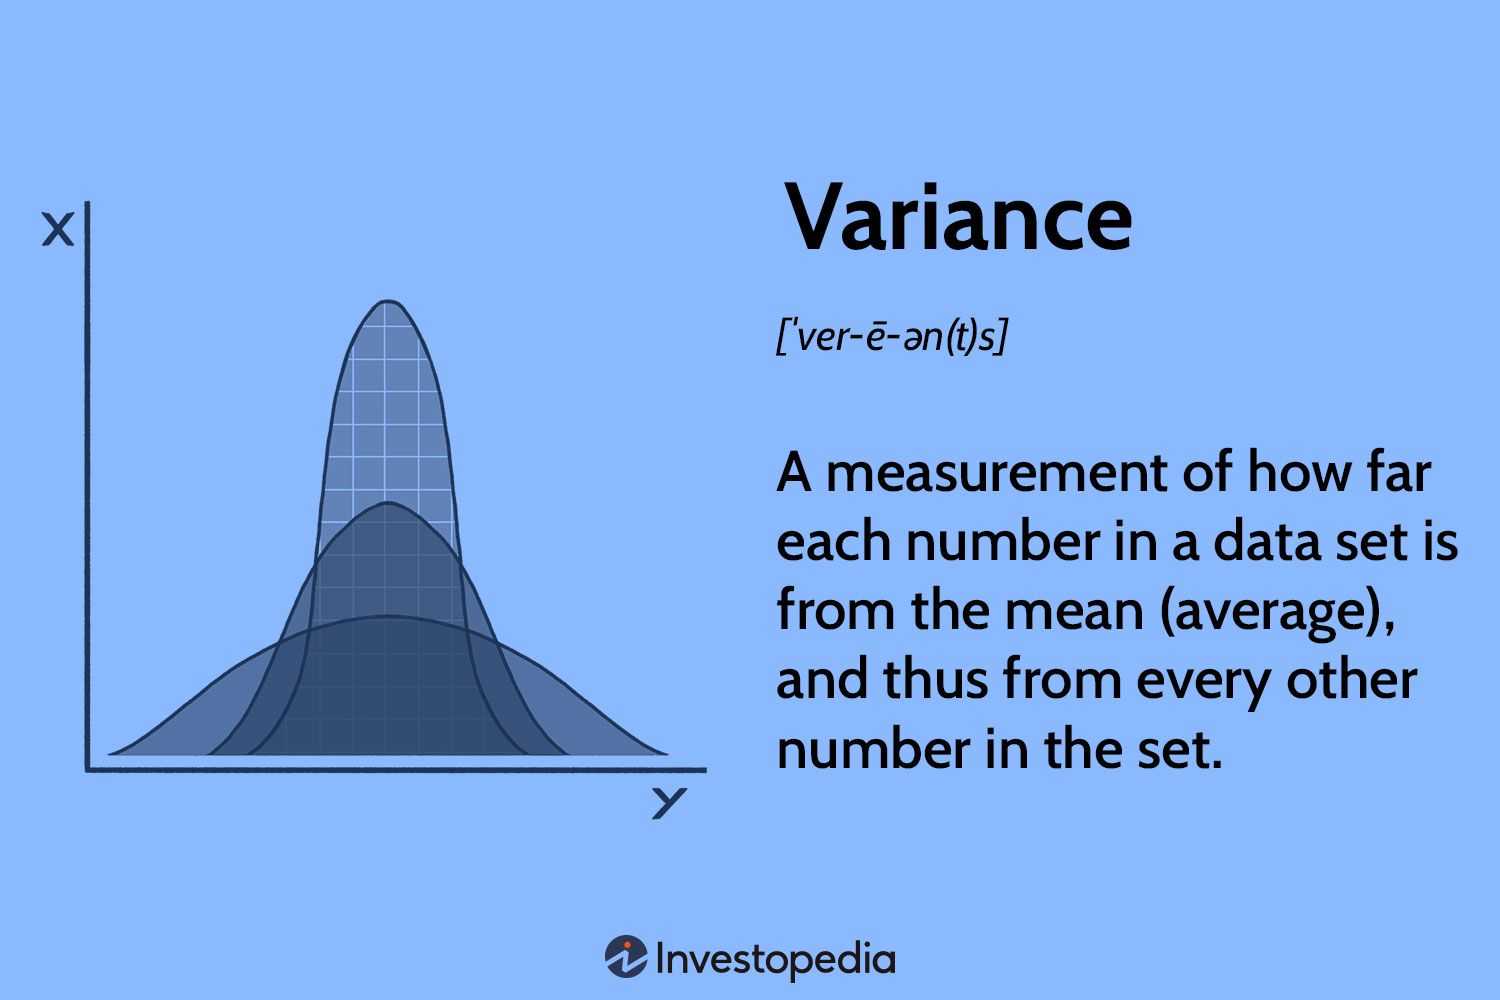

In [22]:
from sklearn.feature_selection import VarianceThreshold

# Sample Data
data = {'Feature1': [1, 1, 1, 1, 1],      # Low variance feature
        'Feature2': [2, 3, 4, 5, 6],      # High variance feature
        'Feature3': [3, 3, 3, 4, 4]}      # Moderate variance feature
df = pd.DataFrame(data)

# Applying Variance Threshold
selector = VarianceThreshold(threshold=0.1)
selected_data = selector.fit_transform(df)
print("Selected Features after Variance Threshold:\n", selected_data)


Selected Features after Variance Threshold:
 [[2 3]
 [3 3]
 [4 3]
 [5 4]
 [6 4]]


#### **Mutual Information for Classification**
- **Explanation**: Mutual information measures the dependency between features and the target variable. High mutual information indicates that the feature provides significant information about the target.
- **Usage**: Particularly useful in classification tasks where you want to measure the amount of information each feature contributes to the prediction.


In [23]:

from sklearn.feature_selection import mutual_info_classif

# Sample Data
data = {'Feature1': [1, 1, 2, 2, 1],
        'Feature2': [1, 2, 2, 1, 2],
        'Target': [0, 1, 1, 0, 1]}
df = pd.DataFrame(data)

# Separating features and target
X = df[['Feature1', 'Feature2']]
y = df['Target']

# Calculating Mutual Information
mutual_info = mutual_info_classif(X, y)
print("Mutual Information Scores:\n", mutual_info)

Mutual Information Scores:
 [0.         1.38333333]
